<a href="https://colab.research.google.com/github/francji1/01NAEX/blob/main/HW/2022/01NAEX_HW01_pulse_1_solution_teamB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAEX - HW1: Pulse problem
**Authors:** Vojtěch Obhlídal, Daniel Karlík, Adam Šumník, Daniil Kirhetov

The goal of this research is to find out the effect of exercise on resting heart rate. Our group consists of 4 members who are considered as operators. Each of us measured resting HR, performed set of chosen physical exercises and afterwards measured heart rate again. We chose 3 physical exercises - squats, push-ups, and jumping-jacks. Number of repetitions for every exercise were set 10, 15 and 20. We performed those exercises in random order.

In [1]:
list_of_packages <- c("tidyverse", "nortest","car","pwr","dplyr","agricolae")
missing_packages <- list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])]

In [2]:
if(length(missing_packages)) install.packages(missing_packages)
lapply(list_of_packages, library, character.only = TRUE)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘proxy’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘R.cache’, ‘e1071’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘combinat’, ‘questionr’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘klaR’, ‘AlgDesign’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required packa

[[1]]
 [1] "forcats"   "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"    
 [7] "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices"
[13] "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "nortest"   "forcats"   "stringr"   "dplyr"     "purrr"     "readr"    
 [7] "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics" 
[13] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "car"       "carData"   "nortest"   "forcats"   "stringr"   "dplyr"    
 [7] "purrr"     "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse"
[13] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[19] "base"     

[[4]]
 [1] "pwr"       "car"       "carData"   "nortest"   "forcats"   "stringr"  
 [7] "dplyr"     "purrr"     "readr"     "tidyr"     "tibble"    "ggplot2"  
[13] "tidyverse" "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[19] "methods"   "base"     

[[5]]
 [1] "pwr"       "car"       "carData"   "nortest"   "forcats"   "stringr"  
 [7] "dplyr"     "purrr"     "readr"     "tidyr"     "tibble"    "ggplot2"  
[13] "tidyverse" "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[19] "methods"   "base"     

[[6]]
 [1] "agricolae" "pwr"       "car"       "carData"   "nortest"   "forcats"  
 [7] "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"     "tibble"   
[13] "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices" "utils"    
[19] "datasets"  "methods"   "base"

1. **Measure the data and set up the experiment so that it is randomized. Be sure to record the order of the
measurements and the operator (member of the group taking the measurements) for each measurement.
The number of replications for operator, exercise and iteration is 1.**

In [3]:
#data <- read.csv("NAEX_HW1/data_hw1_final.csv", sep = ",", header = T, fileEncoding="UTF-8-BOM")
data <- read.csv("https://raw.githubusercontent.com/francji1/01NAEX/main/HW/2022/NAEX_2022_HW01_sol_teamB.csv")
head(data)


,name,exercise,reps,order,hr0,hr1
,<chr>,<chr>,<int>,<int>,<int>,<int>
1,Adam,push-ups,10,6,50,70
2,Adam,squats,10,1,50,71
3,Adam,j-jacks,10,7,50,69
4,Adam,push-ups,15,3,50,79
5,Adam,squats,15,5,50,74
6,Adam,j-jacks,15,2,50,76


First, we need to load the data we messured. After brief preprocessing, we end up with following variables:


*   *name* - categorical, name of an operator
*   *exercise* - categorical, type of an exercise
*   *reps* - numerical, number of repetitions of given exercise
*   *order* - categorical, random order in which the exercises were performed
*   *hr0* - numerical, measured resting heart rate
*   *hr1* - numerical, heart rate measured after exercise


In [4]:
data_prep = data %>%
  mutate(name = as_factor(name),
         exercise = as_factor(exercise),
         order = as_factor(order))

summary(data_prep)
#str(data_prep)

      name       exercise       reps        order         hr0      
 Adam   :9   push-ups:12   Min.   :10   1      : 4   Min.   :50.0  
 Daniel :9   squats  :12   1st Qu.:10   2      : 4   1st Qu.:54.5  
 Daniil :9   j-jacks :12   Median :15   3      : 4   Median :60.0  
 Vojtech:9                 Mean   :15   4      : 4   Mean   :61.0  
                           3rd Qu.:20   5      : 4   3rd Qu.:66.5  
                           Max.   :20   6      : 4   Max.   :74.0  
                                        (Other):12                 
      hr1        
 Min.   : 69.00  
 1st Qu.: 76.75  
 Median : 88.00  
 Mean   : 89.97  
 3rd Qu.:101.00  
 Max.   :117.00  
                 

2. **Calculate the basic statistics (mean, median and sd for each variable). Display the measured data (box
plot, interaction plot, effects plot) and comment what we can predict about the outcome from the given
figures before the analysis**

We compute basic statistics for our data. We focus on the change of heart rate (HR) after performing an exercise. For this purpose, the data were grouped by variables of importance - *name*, *exercise* and *reps*.

In [5]:
data_prep %>%                              
  group_by(name) %>% 
  summarize(min = min(hr1-hr0),
            q1 = quantile(hr1-hr0, 0.25),
            median = median(hr1-hr0),
            mean = mean(hr1-hr0),
            q3 = quantile(hr1-hr0, 0.75),
            max = max(hr1-hr0),
            std = sd(hr1-hr0))

name,min,q1,median,mean,q3,max,std
<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
Adam,19,21,25,24.55556,27,30,3.908680
Daniel,12,22,32,29.11111,36,40,9.545214
Daniil,19,31,37,34.00000,38,43,7.952987
Vojtech,16,24,30,28.22222,32,40,7.774603


In [6]:
data_prep %>%                              
  group_by(exercise) %>% 
  summarize(min = min(hr1-hr0),
            q1 = quantile(hr1-hr0, 0.25),
            median = median(hr1-hr0),
            mean = mean(hr1-hr0),
            q3 = quantile(hr1-hr0, 0.75),
            max = max(hr1-hr0),
            std = sd(hr1-hr0))

exercise,min,q1,median,mean,q3,max,std
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
push-ups,16,23,31.0,29.00000,33.00,40,7.710677
squats,21,24,29.0,30.66667,36.50,43,7.499495
j-jacks,12,20,25.5,27.25000,33.25,41,9.076693


In [7]:
data_prep %>%                              
  group_by(reps) %>% 
  summarize(min = min(hr1-hr0),
            q1 = quantile(hr1-hr0, 0.25),
            median = median(hr1-hr0),
            mean = mean(hr1-hr0),
            q3 = quantile(hr1-hr0, 0.75),
            max = max(hr1-hr0),
            std = sd(hr1-hr0))

reps,min,q1,median,mean,q3,max,std
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
10,12,19.75,21.5,24.41667,27.00,41,9.070014
15,19,24.00,28.5,28.66667,32.75,40,6.541244
20,25,30.75,32.0,33.83333,38.50,43,5.556869


From the tables above we can determine which operators had highest heart rate change in average. Also, with the basic information we got from those statistics, we can see that the mean change of HR was the largest for squats followed by push-ups and jumping-jacks.

We continue with mean value of HR change for pairs *name-exercise* and *name-reps*.

In [8]:
with(data_prep, tapply(hr1-hr0,list(name,exercise),mean))
with(data_prep, tapply(hr1-hr0,list(name,reps),mean))


,push-ups,squats,j-jacks
Adam,26.33333,24.00000,23.33333
Daniel,36.00000,30.00000,21.33333
Daniil,27.00000,38.66667,36.33333
Vojtech,26.66667,30.00000,28.00000


,10,15,20
Adam,20.00000,26.33333,27.33333
Daniel,23.33333,29.33333,34.66667
Daniil,34.33333,30.33333,37.33333
Vojtech,20.00000,28.66667,36.00000


In the following part we perform graphical analysis of our data. We start with various boxplots.

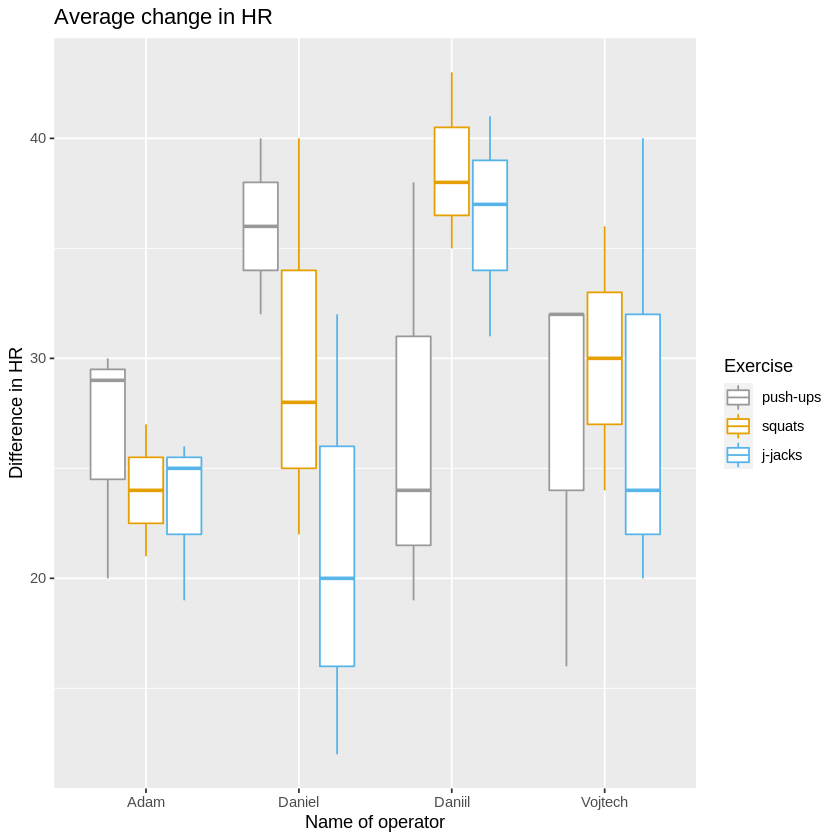

In [9]:
data_prep %>%
  ggplot(aes(x=name, y=hr1-hr0, color=exercise)) +
  ggtitle("Average change in HR") +
  scale_color_manual(values=c("#999999", "#E69F00", "#56B4E9")) +
  labs(x = "Name of operator", y = "Difference in HR", color = "Exercise") +
  geom_boxplot()

Warning message:
“Removed 3 rows containing missing values (geom_segment).”


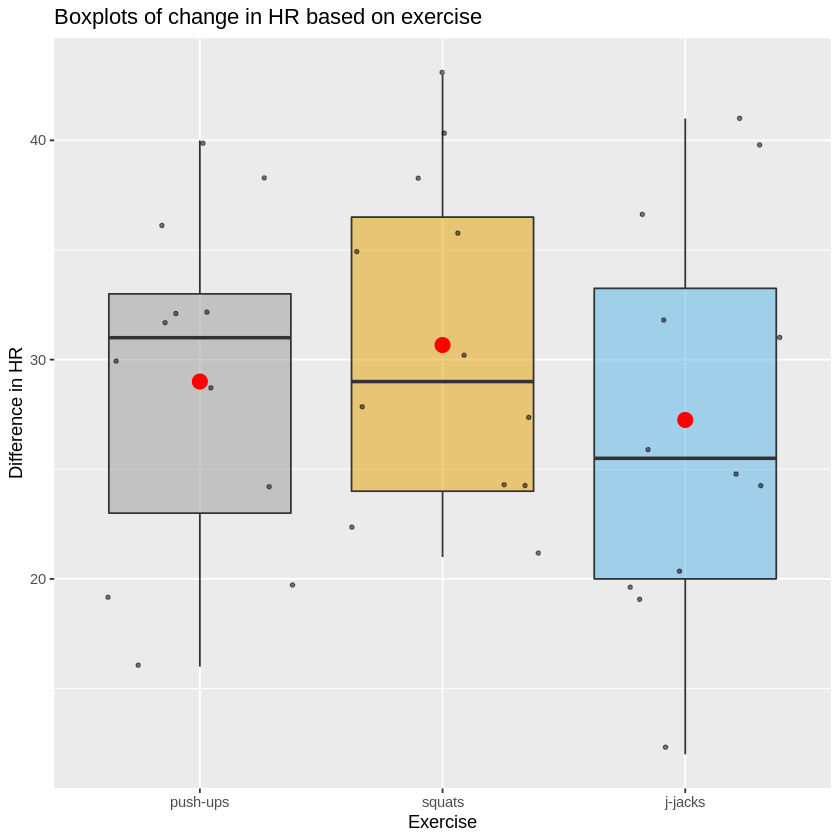

In [10]:
data_prep %>%
  ggplot(aes(x=exercise, y=hr1-hr0, fill=exercise)) + 
  geom_boxplot(alpha = 0.5) + 
  stat_summary(fun="mean", size=0.8, color='red') +
  geom_jitter(color="black", size=0.9, alpha=0.5) +
  labs(x = "Exercise", y = "Difference in HR") +
  ggtitle("Boxplots of change in HR based on exercise") + 
  scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9")) +
  theme(legend.position="none")

We are interested in how change of HR is affected with increasing number of repetitions. We observe this relation in the following graph for every operator separately.

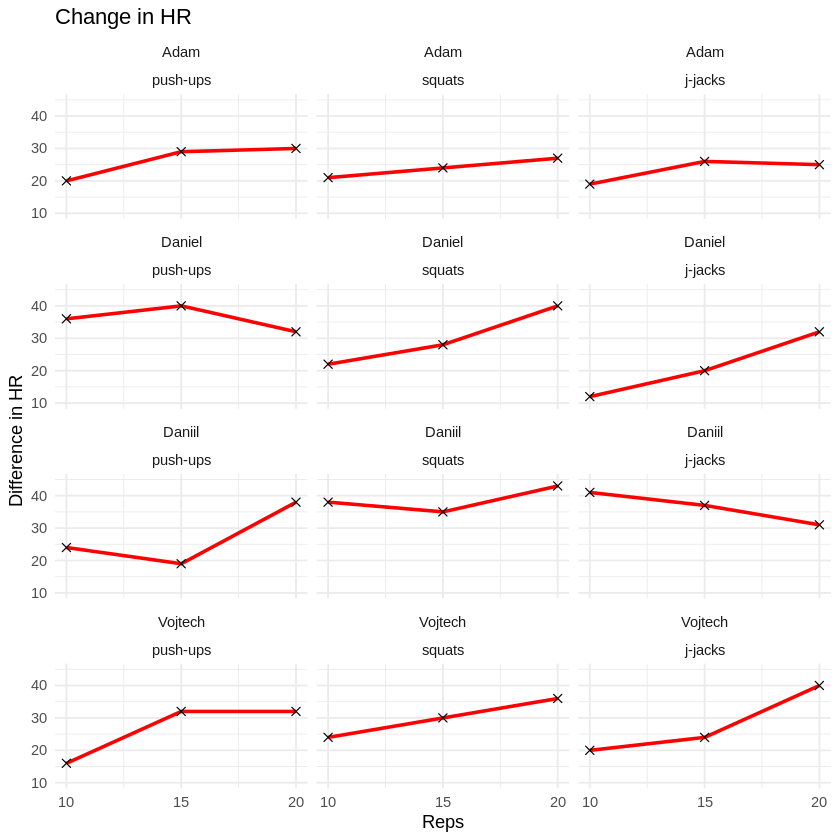

In [11]:
data_prep %>%
  ggplot(aes(x=reps, y=hr1-hr0)) +
  geom_line(color = "red", lwd = 1) + 
  geom_point(color = "black", size = 2, shape = 4) +
  ylim(c(10,45)) +
  scale_x_continuous(breaks = c(10,15,20)) +
  labs(x = "Reps", y = "Difference in HR") +
  ggtitle("Change in HR") +
  facet_wrap(vars(name,exercise),ncol = 3) +
  theme_minimal()

From the figure above we can see that the number of reps influence the heart rate change. More reps leads to increase in heart rate change, which makes sense.
However every operator has different "trends" for every exercise, this might be influenced by physical condition of each operator.

As we already discussed, there are basically 3 important variables - *name*, *exercise* and *reps*. In the following parts we will investigate their influence on change of HR. To sum up, we suppose that increasing number of repetitions leads to and increase in HR. Also, operator Adam in average experience the lowest change in HR after performing an exercise. Finally, if we take in account only the cange of HR, the most difficult type of exercise are squats and the least one is jumping-jack.

3. **Focus especially on the factors exercise and iteration, operator is a nuisance parameter. Run one-way
analysis of variance for each factor separately. Are there significance differences in means of hart rate
increases? For each factor: perform Tukey HSD and Fisher LSD test for pairwise comparison of means
of individual groups,**

**EXERCISE**

In [12]:
exercise.aov <- aov(hr1-hr0~exercise,data=data_prep)
summary(exercise.aov)

bartlett.test(hr1-hr0 ~ exercise, data=data_prep)

            Df Sum Sq Mean Sq F value Pr(>F)
exercise     2   70.1   35.03   0.531  0.593
Residuals   33 2178.9   66.03               


	Bartlett test of homogeneity of variances

data:  hr1 - hr0 by exercise
Bartlett's K-squared = 0.46439, df = 2, p-value = 0.7928


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = hr1 - hr0 ~ exercise, data = data_prep)

$exercise
                      diff        lwr      upr     p adj
squats-push-ups   1.666667  -6.473361 9.806695 0.8706588
j-jacks-push-ups -1.750000  -9.890028 6.390028 0.8584491
j-jacks-squats   -3.416667 -11.556695 4.723361 0.5635835


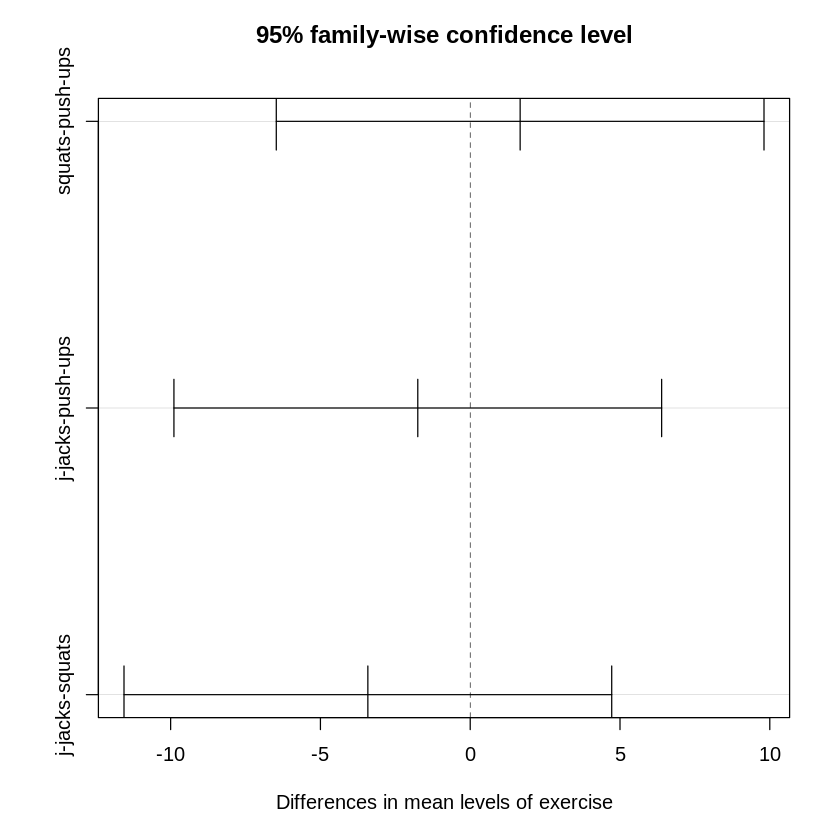

In [13]:
Tukey.exercise <- TukeyHSD(exercise.aov ,which="exercise")
Tukey.exercise
plot(Tukey.exercise)

$statistics
   MSerror Df     Mean       CV  t.value      LSD
  66.02778 33 28.97222 28.04668 2.034515 6.749144

$parameters
        test p.ajusted   name.t ntr alpha
  Fisher-LSD      none exercise   3  0.05

$means
         hr1 - hr0      std  r      LCL      UCL Min Max Q25  Q50   Q75
j-jacks   27.25000 9.076693 12 22.47763 32.02237  12  41  20 25.5 33.25
push-ups  29.00000 7.710677 12 24.22763 33.77237  16  40  23 31.0 33.00
squats    30.66667 7.499495 12 25.89430 35.43903  21  43  24 29.0 36.50

$comparison
NULL

$groups
         hr1 - hr0 groups
squats    30.66667      a
push-ups  29.00000      a
j-jacks   27.25000      a

attr(,"class")
[1] "group"

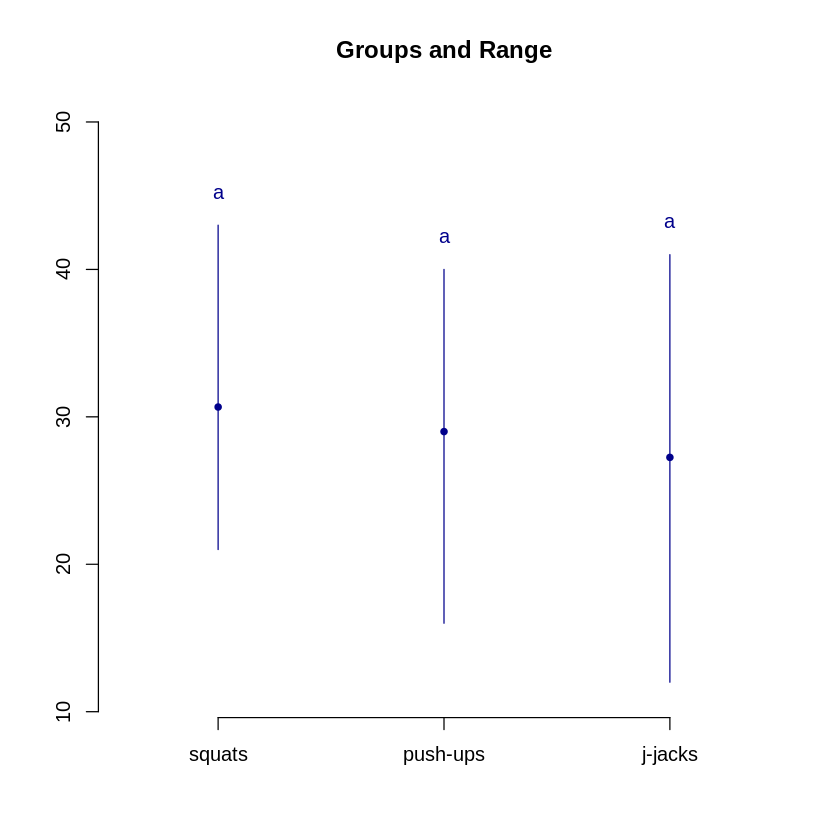

In [14]:
FisherLSD.exercise <- LSD.test(exercise.aov, "exercise")
FisherLSD.exercise
plot(FisherLSD.exercise)

Using ANOVA test there is no significant difference between types of exercise and change of HR. Using the Tukey test we get the same results as well.

**OPERATOR (NAME)**

In [15]:
name.aov <- aov(hr1-hr0 ~ name, data = data_prep)
summary(name.aov)

bartlett.test(hr1-hr0 ~ name, data=data_prep)

            Df Sum Sq Mean Sq F value Pr(>F)  
name         3  408.3  136.10   2.366 0.0893 .
Residuals   32 1840.7   57.52                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Bartlett test of homogeneity of variances

data:  hr1 - hr0 by name
Bartlett's K-squared = 5.4847, df = 3, p-value = 0.1396


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = hr1 - hr0 ~ name, data = data_prep)

$name
                     diff         lwr       upr     p adj
Daniel-Adam     4.5555556  -5.1310878 14.242199 0.5855567
Daniil-Adam     9.4444444  -0.2421989 19.131088 0.0581592
Vojtech-Adam    3.6666667  -6.0199767 13.353310 0.7358563
Daniil-Daniel   4.8888889  -4.7977545 14.575532 0.5283052
Vojtech-Daniel -0.8888889 -10.5755322  8.797754 0.9944928
Vojtech-Daniil -5.7777778 -15.4644211  3.908866 0.3842478


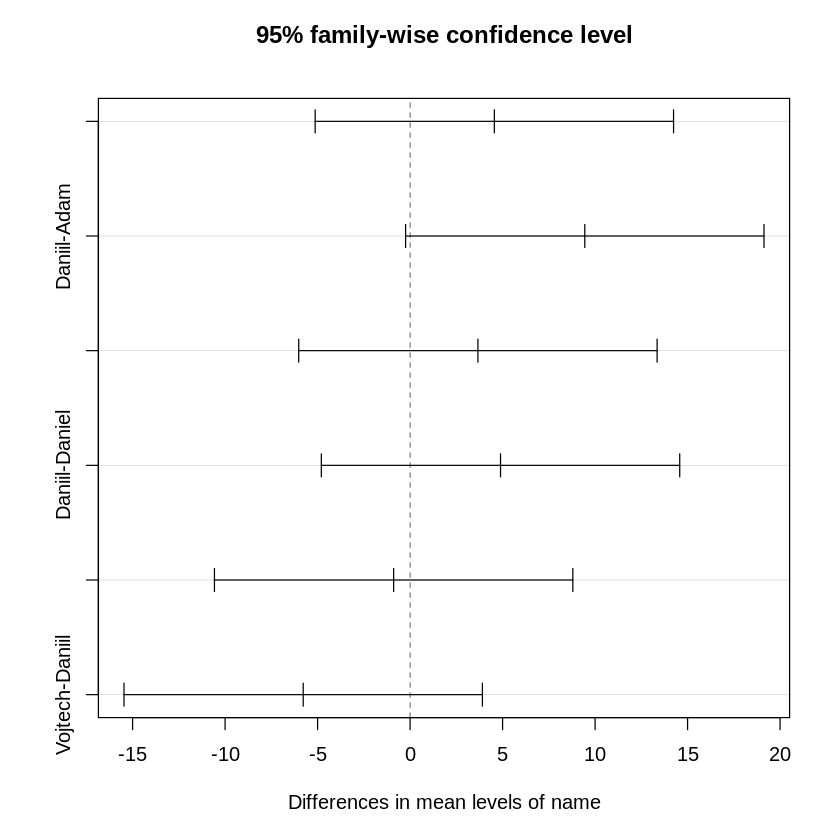

In [16]:
Tukey.name <- TukeyHSD(name.aov ,which="name")
Tukey.name
plot(Tukey.name)

$statistics
   MSerror Df     Mean       CV  t.value      LSD
  57.52083 32 28.97222 26.17766 2.036933 7.282544

$parameters
        test p.ajusted name.t ntr alpha
  Fisher-LSD      none   name   4  0.05

$means
        hr1 - hr0      std r      LCL      UCL Min Max Q25 Q50 Q75
Adam     24.55556 3.908680 9 19.40602 29.70509  19  30  21  25  27
Daniel   29.11111 9.545214 9 23.96157 34.26065  12  40  22  32  36
Daniil   34.00000 7.952987 9 28.85046 39.14954  19  43  31  37  38
Vojtech  28.22222 7.774603 9 23.07269 33.37176  16  40  24  30  32

$comparison
NULL

$groups
        hr1 - hr0 groups
Daniil   34.00000      a
Daniel   29.11111     ab
Vojtech  28.22222     ab
Adam     24.55556      b

attr(,"class")
[1] "group"

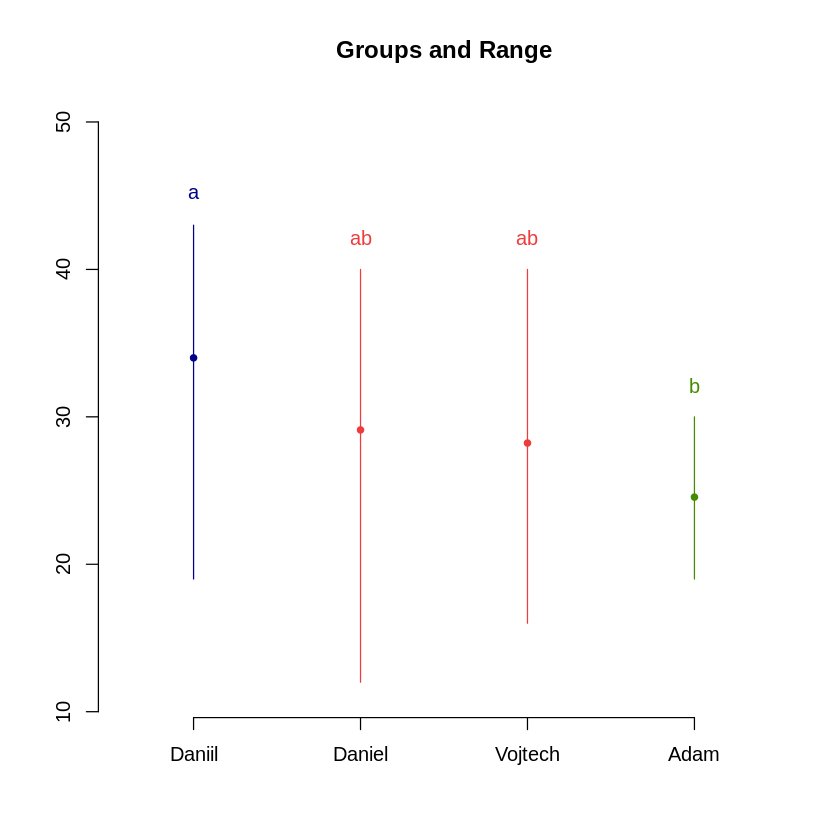

In [17]:
FisherLSD.name <- LSD.test(name.aov, "name")
FisherLSD.name
plot(FisherLSD.name)

Using ANOVA we get ambiguous results and p-values is very close to the level of rejecting the equality of means. From a Tukey HSD and Fisher LSD test we see that there are possible differences in HR change between operators Daniil and Adam. Results of other two operators Vojtech and Daniel are really close to each other and do not differ significantly from the former separately.

**REPS**

In [ ]:
data_reps = data_prep %>%
  mutate(reps = as_factor(reps))

reps.aov <- aov(hr1-hr0 ~ reps, data = data_reps)
summary(reps.aov)

bartlett.test(hr1-hr0 ~ reps, data=data_reps)

            Df Sum Sq Mean Sq F value Pr(>F)  
reps         2  533.7  266.86   5.134 0.0114 *
Residuals   33 1715.3   51.98                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Bartlett test of homogeneity of variances

data:  hr1 - hr0 by reps
Bartlett's K-squared = 2.7082, df = 2, p-value = 0.2582


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = hr1 - hr0 ~ reps, data = data_reps)

$reps
          diff       lwr      upr     p adj
15-10 4.250000 -2.972197 11.47220 0.3306479
20-10 9.416667  2.194470 16.63886 0.0083161
20-15 5.166667 -2.055530 12.38886 0.2003387


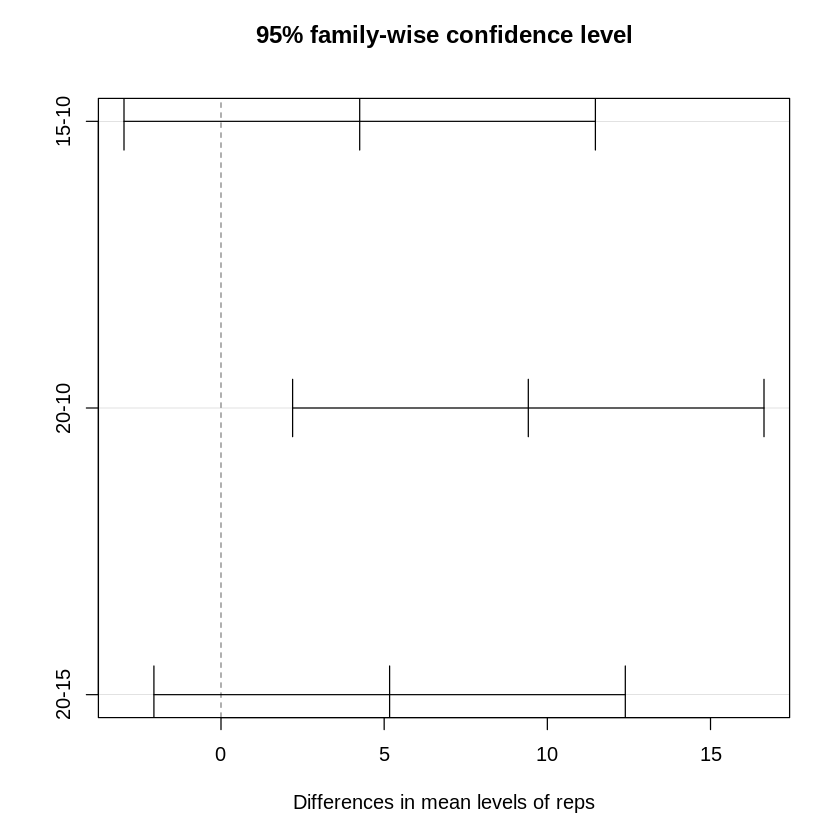

In [ ]:
Tukey.reps<- TukeyHSD(reps.aov ,which="reps")
Tukey.reps
plot(Tukey.reps)

$statistics
   MSerror Df     Mean       CV  t.value      LSD
  51.97727 33 28.97222 24.88427 2.034515 5.988142

$parameters
        test p.ajusted name.t ntr alpha
  Fisher-LSD      none   reps   3  0.05

$means
   hr1 - hr0      std  r      LCL      UCL Min Max   Q25  Q50   Q75
10  24.41667 9.070014 12 20.18241 28.65092  12  41 19.75 21.5 27.00
15  28.66667 6.541244 12 24.43241 32.90092  19  40 24.00 28.5 32.75
20  33.83333 5.556869 12 29.59908 38.06759  25  43 30.75 32.0 38.50

$comparison
NULL

$groups
   hr1 - hr0 groups
20  33.83333      a
15  28.66667     ab
10  24.41667      b

attr(,"class")
[1] "group"

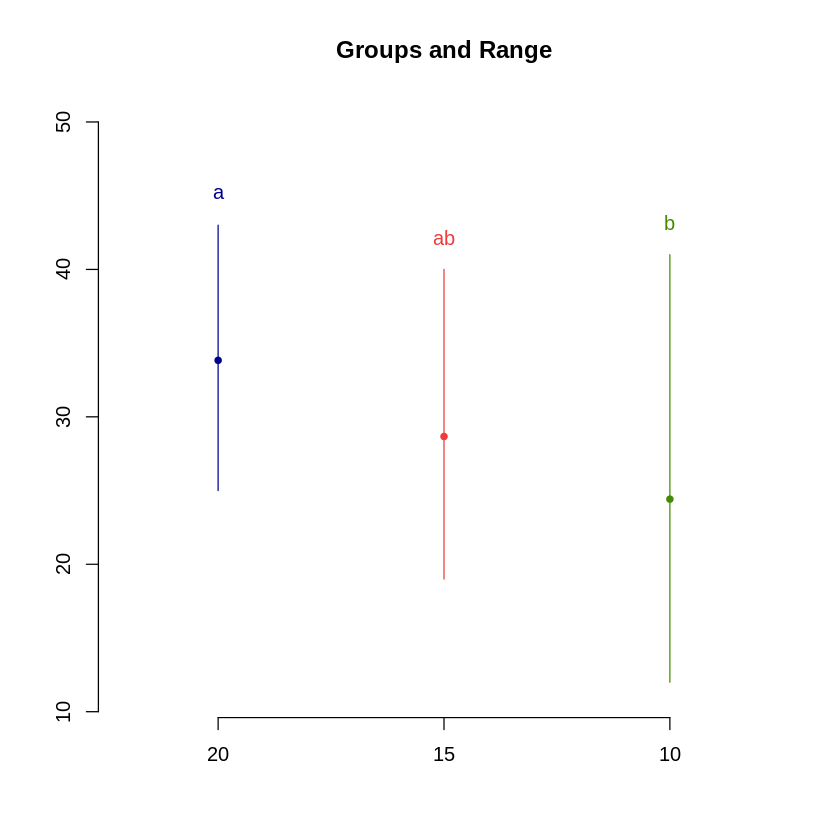

In [ ]:
FisherLSD.reps <- LSD.test(reps.aov, "reps")
FisherLSD.reps
plot(FisherLSD.reps)

As we can see, ANOVA and both Tukey HSD and Fisher LSD tests confirms the hypothesis, that there is a significant difference between 10 and 20 reps, as we expected and assumed from the descriptive part.

4. **Analyse the data using ANOVA (take all variables as a factor):**

*   **With the assumption that each of the participants in the experiment forms a block** 
*   **Discuss results, verify assumptions, plot QQ-plot, residuals x fitted values, residuals x factor levels**
*   **Discuss the effect of the experimental design and the evolution of the residuals over time (number of measurements)**
*   **If the measured data do not meet the assumptions for using ANOVA, discuss possible transformations (logarithmic, Box-Cox, ...) and the reason why the data do not meet the assumptions?**

In [ ]:
data_fact = data_prep %>%
  mutate(reps = as_factor(reps),
         hr_diff = hr1 - hr0)

anova <- aov(hr_diff~name+exercise+reps,data_fact)
summary(anova)

            Df Sum Sq Mean Sq F value  Pr(>F)   
name         3  408.3  136.10   3.081 0.04351 * 
exercise     2   70.1   35.03   0.793 0.46241   
reps         2  533.7  266.86   6.041 0.00659 **
Residuals   28 1236.9   44.17                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

From the results provided by ANOVA test, we see that the variable *exercise* is not significant, so we exclude it from the model.

In [ ]:
anova2 <- aov(hr_diff~name+reps,data_fact)
summary(anova2)

            Df Sum Sq Mean Sq F value  Pr(>F)   
name         3  408.3  136.10   3.124 0.04044 * 
reps         2  533.7  266.86   6.126 0.00588 **
Residuals   30 1306.9   43.56                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Variable *name* which stands for operator is significant and therefore RCBD is useful.

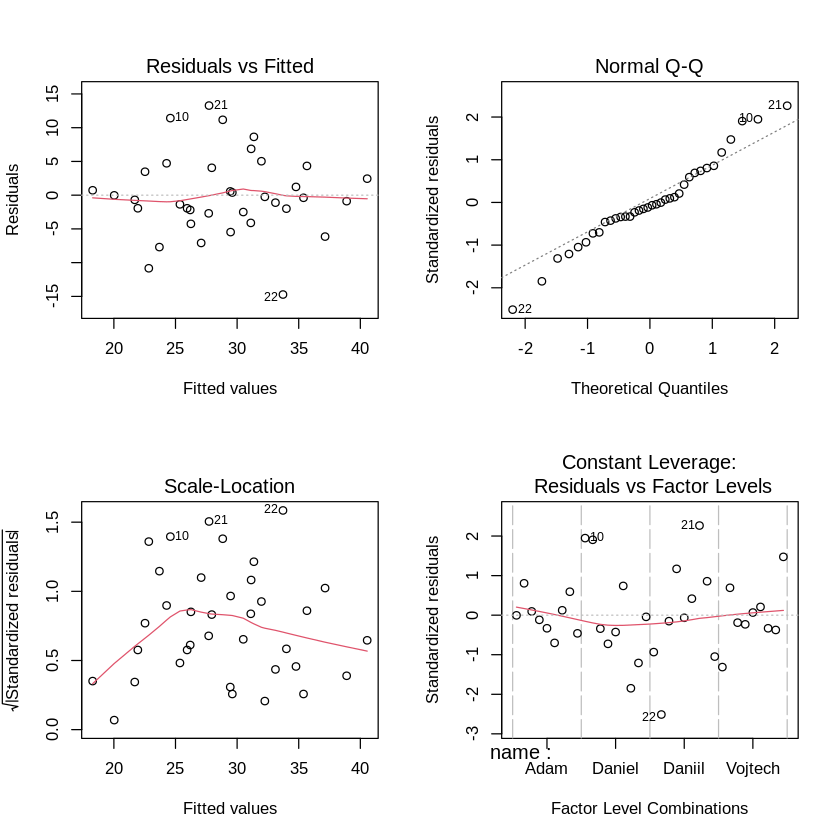

In [ ]:
par(mfrow=c(2,2)) 

plot(anova, which = 1)
plot(anova, which = 2)
plot(anova, which = 3)
plot(anova, which = 5)

From the graphical analysis of residuals we cannot conclude for sure the normality of residuals. The **Scale-Location** graph is affected by outlier on the left side and there are heavy tails observed in **Q-Q plot**. Therefore we conduct a normality test. 

In [ ]:
lillie.test(anova2$residuals)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  anova2$residuals
D = 0.087898, p-value = 0.6865


According to Lilliefors normality test, we conclude that the residuals are normally distributed and there is no need to use any transformations. 

            Df Sum Sq Mean Sq F value Pr(>F)
order        8  666.2   83.28   1.421  0.233
Residuals   27 1582.8   58.62               

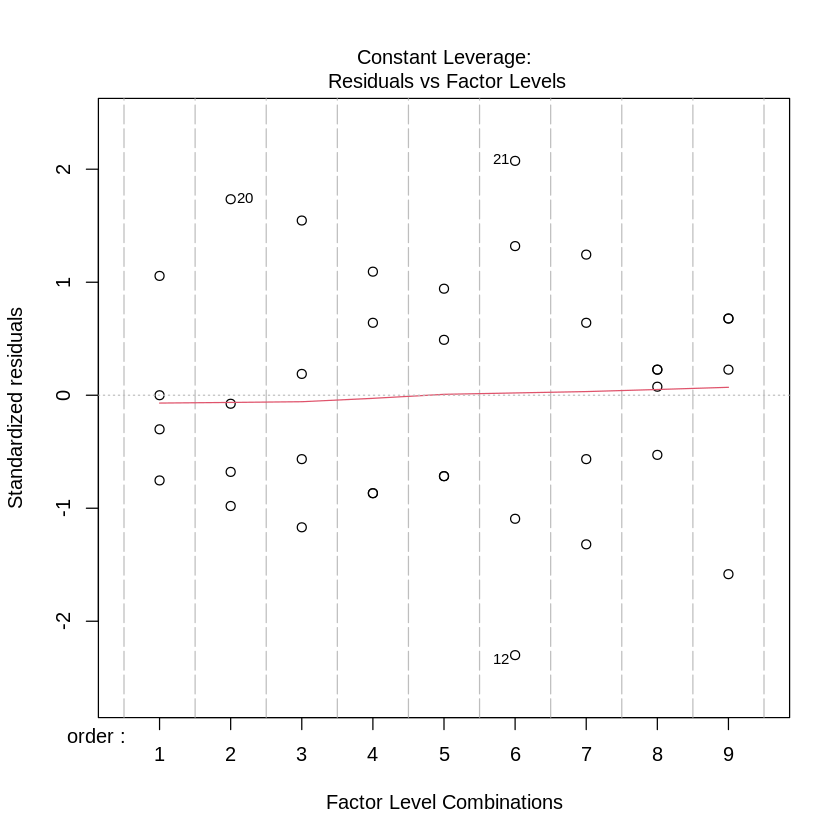

In [ ]:
anova_order <- aov(hr_diff~order,data_fact)
summary(anova_order)

plot(anova_order, which=5)

In the figure above, we can see the results from ANOVA test with *order* as an only predictor of HR change. There is no relation between these two variables.

5. **Choose one level of iteration factor and even if it does not meet the assumptions for using ANOVA, solve the following:**
*    **Calculate the power of the test in the ANOVA for 3 levels of exercises and n operators**
*    **Assume the standard deviation of the disturbances to be 4 for the experiment conducted and the maximum (for us significant) difference we want to detect is 5 bpm. Calculate the number of operators needed for the power of the resulting test to be greater than 0.9.**

In [ ]:
b = seq(23,28,by=1)
a = 3
D = 5
sigma = 4

powers <- power.anova.test(groups=a,n=b,between.var = (D^2/2)/(a),
                           within.var=sigma^2,sig.level=.05)$power

rbind(b, powers)


Warning message in !is.null(n) && n < 2:
“'length(x) = 6 > 1' in coercion to 'logical(1)'”


b,23.0000000,24.0000000,25.0000000,26.0000000,27.0000000,28.0000000
powers,0.8668938,0.8821638,0.8958734,0.9081502,0.9191169,0.9288907


In accordance to ANOVA power test, we would need at least 26 operators to achive power of test greater than 0.9.

6. **Create a regression model where you do not consider blocks and the iteration of exercises is the quantitative variable:**
*    **Try to add a squared variable to the model and compare the two regression models with each other and select the more appropriate one**
*    **Check the assumptions for using the chosen model.**

In [ ]:
library(MASS)

model0 <- lm(hr1-hr0 ~ exercise + reps, data = data_prep)
summary(model0)


Call:
lm(formula = hr1 - hr0 ~ exercise + reps, data = data_prep)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.542  -4.042  -1.479   4.302  18.458 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      14.8750     4.8568   3.063  0.00442 **
exercisesquats    1.6667     2.9287   0.569  0.57328   
exercisej-jacks  -1.7500     2.9287  -0.598  0.55436   
reps              0.9417     0.2929   3.215  0.00297 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.174 on 32 degrees of freedom
Multiple R-squared:  0.2677,	Adjusted R-squared:  0.1991 
F-statistic:   3.9 on 3 and 32 DF,  p-value: 0.01757


In [ ]:
model0_step <- stepAIC(model0, direction = "both",
                                    trace = FALSE)
summary(model0_step)


Call:
lm(formula = hr1 - hr0 ~ reps, data = data_prep)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.264  -4.441  -1.681   4.747  16.736 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  14.8472     4.5099   3.292  0.00232 **
reps          0.9417     0.2901   3.246  0.00263 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.106 on 34 degrees of freedom
Multiple R-squared:  0.2366,	Adjusted R-squared:  0.2141 
F-statistic: 10.54 on 1 and 34 DF,  p-value: 0.002631


Using AIC we reduced model and we ended up with only one variable - *reps*.

In [ ]:
model1 <- lm(hr1-hr0 ~ exercise + reps + I(reps^2) , data = data_prep)
summary(model1)


Call:
lm(formula = hr1 - hr0 ~ exercise + reps + I(reps^2), data = data_prep)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.694  -4.194  -1.486   4.222  18.306 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)
(Intercept)     18.69444   22.02290   0.849    0.402
exercisesquats   1.66667    2.97408   0.560    0.579
exercisej-jacks -1.75000    2.97408  -0.588    0.561
reps             0.39167    3.10503   0.126    0.900
I(reps^2)        0.01833    0.10303   0.178    0.860

Residual standard error: 7.285 on 31 degrees of freedom
Multiple R-squared:  0.2685,	Adjusted R-squared:  0.1741 
F-statistic: 2.844 on 4 and 31 DF,  p-value: 0.04059


In [ ]:
model1_step <- stepAIC(model1, direction = "both", trace = FALSE)
summary(model1_step)


Call:
lm(formula = hr1 - hr0 ~ I(reps^2), data = data_prep)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.542  -4.474  -1.923   4.577  16.458 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 21.415520   2.609754   8.206 1.42e-09 ***
I(reps^2)    0.031269   0.009623   3.249  0.00261 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.104 on 34 degrees of freedom
Multiple R-squared:  0.2369,	Adjusted R-squared:  0.2145 
F-statistic: 10.56 on 1 and 34 DF,  p-value: 0.002608


We ended up with two models, the first one variable *reps* and the second one with its square. We cannot compare it with ANOVA, so we can compare both models with AIC.

In [ ]:
print("Model: hr1-hr0 ~ reps")
extractAIC(model0_step)[2]
print("Model: hr1-hr0 ~ reps^2")
extractAIC(model1_step)[2]

[1] "Model: hr1-hr0 ~ reps"


[1] 143.1319

[1] "Model: hr1-hr0 ~ reps^2"


[1] 143.1143

Both models have identical AIC value. Next, we compare full models with ANOVA, which is possible for nested models.

In [ ]:
anova(model0,model1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,32,1646.875,NA,NA,NA,NA
2,31,1645.194,1,1.680556,0.0316663,0.8599198


There is no significant difference between both models. We check assumptions for **model0_step**, because it is less complicated than **model1_step**.

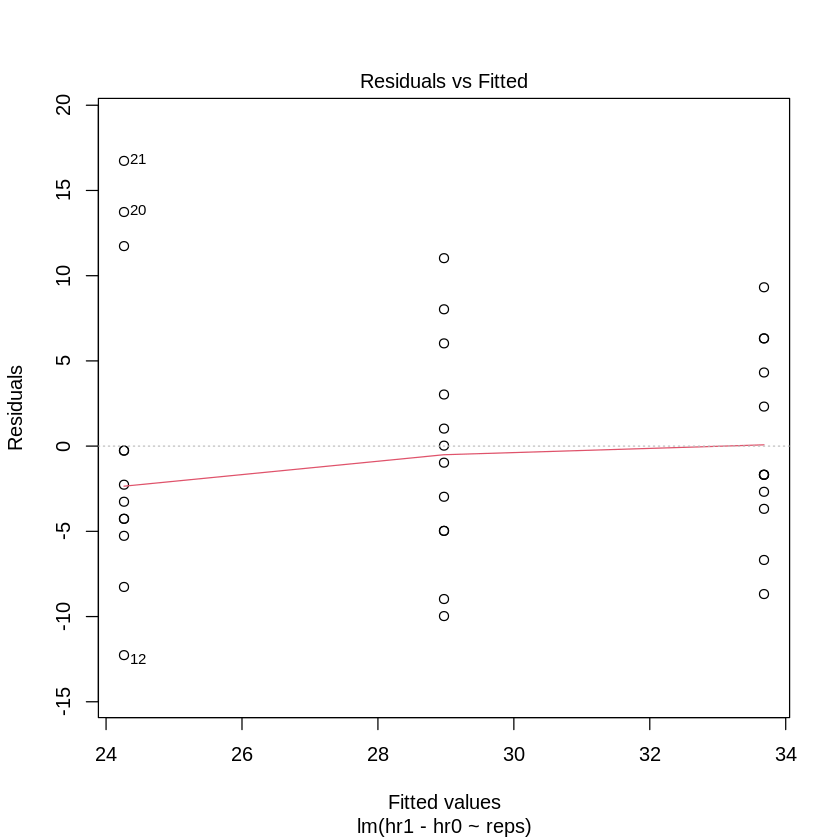

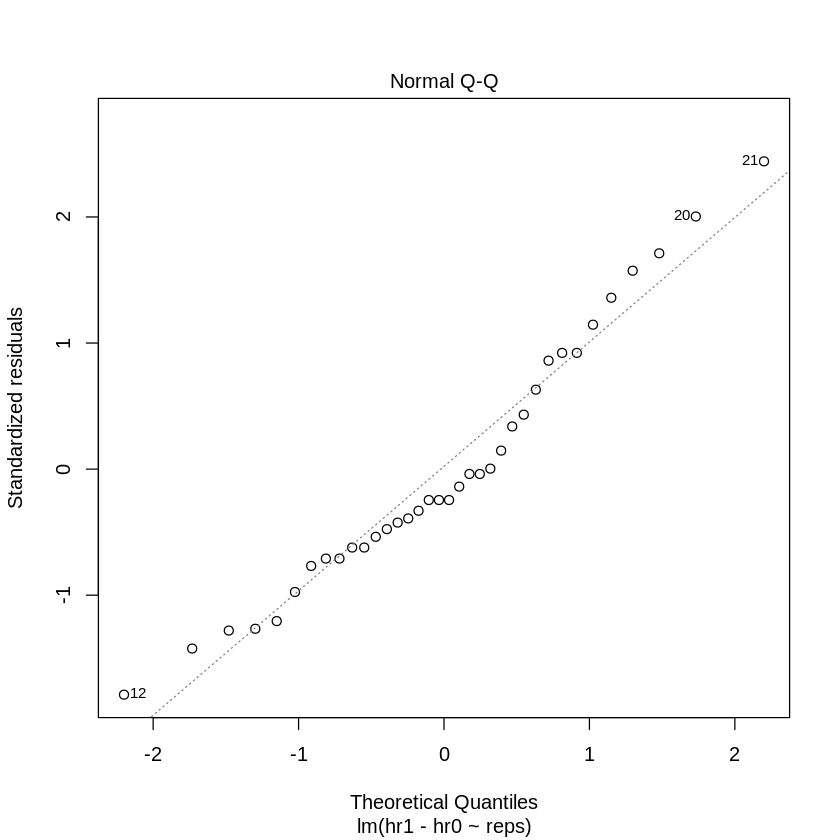

In [ ]:
plot(model0_step,1:2)

7. **If you based your previous answers on the p-value, discuss following. Does p-value provide a good measure of evidence regarding a model or hypothesis?**

Generally, p-value provides a fine measure of evidence. Although, results near the acceptance level may be ambiguous and we should consider other measurements of quality of evidence. Especially with TukeyHSD and FisherLSD it can be confusing while not using any corrections of p-value.